In [4]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [5]:
train_df_oe = pd.read_csv(DATASET_DIR + "/train_df_oe.csv", keep_default_na=False)
y = train_df_oe.iloc[:,-1]
X = train_df_oe.iloc[:,:-1]

In [13]:
train_df_oe

,Authors,PublishYear,PublishMonth,PublishDay,Publisher,pagesNumber,reading_writing,gay_lesbian,secret_life,travel_guide,...,north america,paperback edition,book cover,book one,family life,civil right,step instruction,young girl,everything need,rating_label
0,8046.0,13.0,3.0,0.0,3917.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,6185.0,12.0,5.0,0.0,1180.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,3220.0,13.0,1.0,6.0,850.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,2368.0,13.0,4.0,0.0,493.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,15253.0,13.0,3.0,1.0,3031.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,6887.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
23059,3613.0,13.0,3.0,0.0,1941.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
23060,2054.0,12.0,1.0,3.0,3468.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
23061,7029.0,13.0,2.0,4.0,2741.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# Stacking Naive Bayes

In [6]:
GAUSSIAN_FEATURES = ['PublishYear', 'pagesNumber']
CATEGORICAL_FEATURES = ['Authors', 'Publisher']
MULTINOMIAL_FEATURES = list(X.columns)[4:]

In [7]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

In [8]:
# Split the training set for each Naive Bayes base classifier
X_gaussian = X[GAUSSIAN_FEATURES]
X_categorical = X[CATEGORICAL_FEATURES]
X_multinomial = X[MULTINOMIAL_FEATURES]

### Gaussian NB for PublishYear and pagesNumber

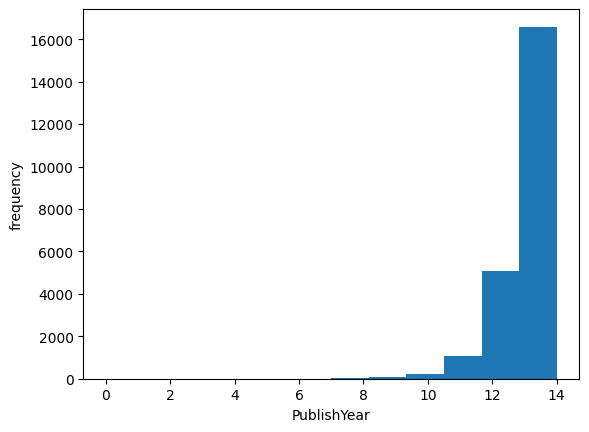

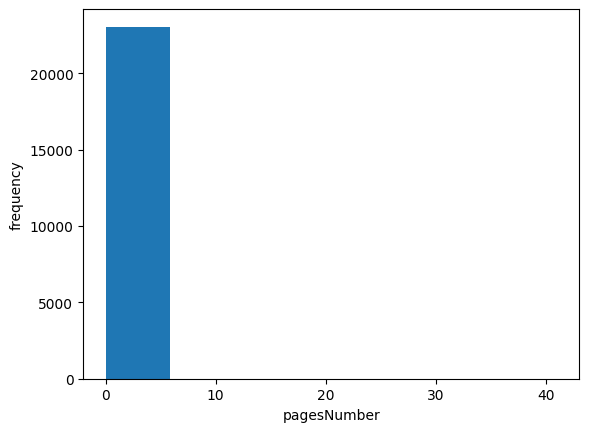

In [10]:
# check distribution of PublishYear and pagesNumber
for feature in GAUSSIAN_FEATURES:
    hist_plot(X, feature, bins=X[feature].nunique())

In [ ]:
gnb = GaussianNB()
gaussian_val_pred = cv_evaluate(gnb, X_gaussian, y)

### Categorical NB for Authors and Publisher

In [ ]:
# Tuning for alpha smoothing
cnb = CategoricalNB(min_categories = [len(ORD_ENCODER.categories_[i]) for i in range(len(CATEGORICAL_FEATURES))])
param_grid = {'alpha': [i/10 for i in range(1, 15)]}
tune_hyperparameter(cnb, param_grid, X_train_categorical, y_train)

# larger alpha -> overestimate the likelihood
# could be because there is more samples with label4 ratings, and the missing values are randomly 
# distributed across the dataset, hence more samples with label4 rating with missing values
# -> likelihood of P(x|c=4) overestimated -> more samples predicted to have label=4

In [ ]:
cnb = CategoricalNB(alpha=0.7, min_categories = [len(ORD_ENCODER.categories_[i]) for i in range(len(CATEGORICAL_FEATURES))])
categorical_val_pred = cv_evaluate(cnb, X_categorical, y)

### Multinomial NB for Name and Description

In [ ]:
# better than complementNB and gaussianNB
mnb = MultinomialNB()
multinomial_val_pred = cv_evaluate(mnb, X_multinomial, y)

### Categorical NB for final prediction

In [ ]:
# CategoricalNB to predict the final rating
# Fit each base model on their training subset
gnb.fit(X_gaussian, y)
gaussian_pred = gnb.predict(X_aussian)
cnb.fit(X_categorical, y)
categorical_pred = cnb.predict(X_categorical)
mnb.fit(X_multinomial, y)
multinomial_pred = mnb.predict(X_multinomial)

In [ ]:
X_preds = pd.DataFrame({'GaussianNB_Year_Pages' : gaussian_pred,
                        'CategoricalNB_Author_Publisher' : categorical_pred,
                        'MultinomialNB_Name_Desc' : multinomial_pred})

# meta-classifier
stack_nb = CategoricalNB()
stack_nb.fit(X_preds, y)  # input = base models' predictions
cv_evaluate(stack_nb, X_preds, y)

### Altogether: Generate Model

In [ ]:
from sklearn.base import ClassifierMixin, BaseEstimator

FEATURE_SETS = [GAUSSIAN_FEATURES, CATEGORICAL_FEATURES, MULTINOMIAL_FEATURES]

In [ ]:
base_classifiers = [GaussianNB(),
                    CategoricalNB(alpha=0.8, min_categories = [len(ORD_ENCODER.categories_[i]) for i in range(len(CATEGORICAL_FEATURES))]),
                    MultinomialNB()]

meta_classifier = CategoricalNB()
snb = StackingNB(base_classifiers, meta_classifier)
snb.fit(X, y)

y_pred = cv_evaluate(snb, X, y)

In [ ]:
class StackingNB(ClassifierMixin, BaseEstimator):

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier
        self.feature_sets = FEATURE_SETS

    def fit(self, X, y):
        base_preds = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            clf.fit(X[feature_set], y)  # base classifier uses a subset of features
        
        X_meta = self._predict_base(X) # output of the base classifiers
        self.metaclassifier.fit(X_meta, y) # # output of the base classifiers = input for meta-classifier
        return self
    
    def _predict_base(self, X):
        y_hats = []
        for clf, feature_set in zip(self.classifiers, self.feature_sets):
            y_hat = clf.predict(X[feature_set])
            y_hats.append(y_hat)
        
        y_hats = pd.DataFrame({'GaussianNB_pred' : y_hats[0],
                               'CategoricalNB_pred' : y_hats[1],
                               'MultinomialNB_pred' : y_hats[2]})
        assert y_hats.shape[0] == X.shape[0] # check that the number of rows yhats matches the number of rows in the input data X
        return y_hats
    
    def predict(self, X): 
        X_meta = self._predict_base(X)
        y_hat = self.metaclassifier.predict(X_meta)
        return y_hat
    
    # for completeness
    def predict_proba(self, X): 
        X_meta = self._predict_base(X)
        return self.metaclassifier.predict_proba(X_meta)
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return accuracy_score(y, y_hat)